# Quasi-periodic test asteroid

Figure 3.4 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of eccentricity and semimajor axis versus time for a test-mass asteroid with initial orbital elements
 * $a_i=0.6944 a_\mathrm{jup}$
 * $e_i=0.2065$. 
 
Distance is in units of $a_\mathrm{jup}$; time is in units of $\mathcal{P}_\mathrm{jup}$. This plot is following 
plots in Murray & Dermott (1999), but we use the [rebound python/C package](https://rebound.readthedocs.io) to 
calcuate the orbits (Rein & Liu [2012, A&A, 537, 128](https://ui.adsabs.harvard.edu/abs/2012A%2526A...537A.128R)). 

For this and the calculation of a chaotic test asteroid in Figure 3.6, we set up a restricted 3-body problem of 
the Sun, Jupiter, and the test-mass asteroid, putting in the semimajor axis of Jupiter and its mass in M$_\mathrm{sun}$, but setting e=0 and i=0.

In [3]:
import rebound

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings

## standard plot setup

In [4]:
plotFile = 'Fig3_4.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Simulation

Simple system: Sun, Jupiter, and a test asteroid with
 * $a_i$ = 0.6944 a$_{jup}$
 * $e_e$ = 0.2065

In [5]:
sim = rebound.Simulation()

# sun

sim.add(m=1.)

# jupiter

aj = 5.2028870
ej = 0.04838624
ij = 1.30439695
mj = 9.547919e-4 # Msun

Pj = aj**1.5 # years

sim.add(m=mj,a=aj,e=0.0,inc=0.0) # ej,inc=ij)

# test asteroid - initial 

at_init = 0.6944*aj # quasiperiodic
et_init = 0.2065

#at_init = 0.6984*aj # chaotic
#et_init = 0.1967

sim.add(m=0.,a=at_init,e=et_init)

sim.move_to_com()

## Run the simulation

Run for 500 jupiter orbits and pick out 300 sequential orbits.  The dimensionless units of the
`rebound` simulation sets G=1, M=1sun, and so 1 years is 2$\pi$ in the simulation time units.

In [6]:
# time units with G=1 are 1 year = 2pi

numPj = 500

tmax = numPj*Pj*2.0*np.pi

tjup = []
atmp= []
etmp = []
for t in np.linspace(0,tmax,1001):
    sim.rand_seed = 12345
    sim.integrate(t)
    o = sim.orbits()
    tjup.append(numPj*t/tmax)
    atmp.append(o[1].a)
    etmp.append(o[1].e)
    
# extract the arrays and put the units in the form for the plot.

tPj = np.array(tjup)
at = np.array(atmp)/aj
et = np.array(etmp)

# restrict attention to a quasi-period series 300 Pjup long that starts at 200 Pjup

tmin = 200.
iorb = np.where(tPj >= tmin)[0]

tMax = numPj - tmin
aqp = at[iorb]
eqp = et[iorb]
tqp = tPj[iorb] - tmin

## Figure 3.4

Two panels, over/under, as follows:
 * top: e vs t
 * bottom: a vs t


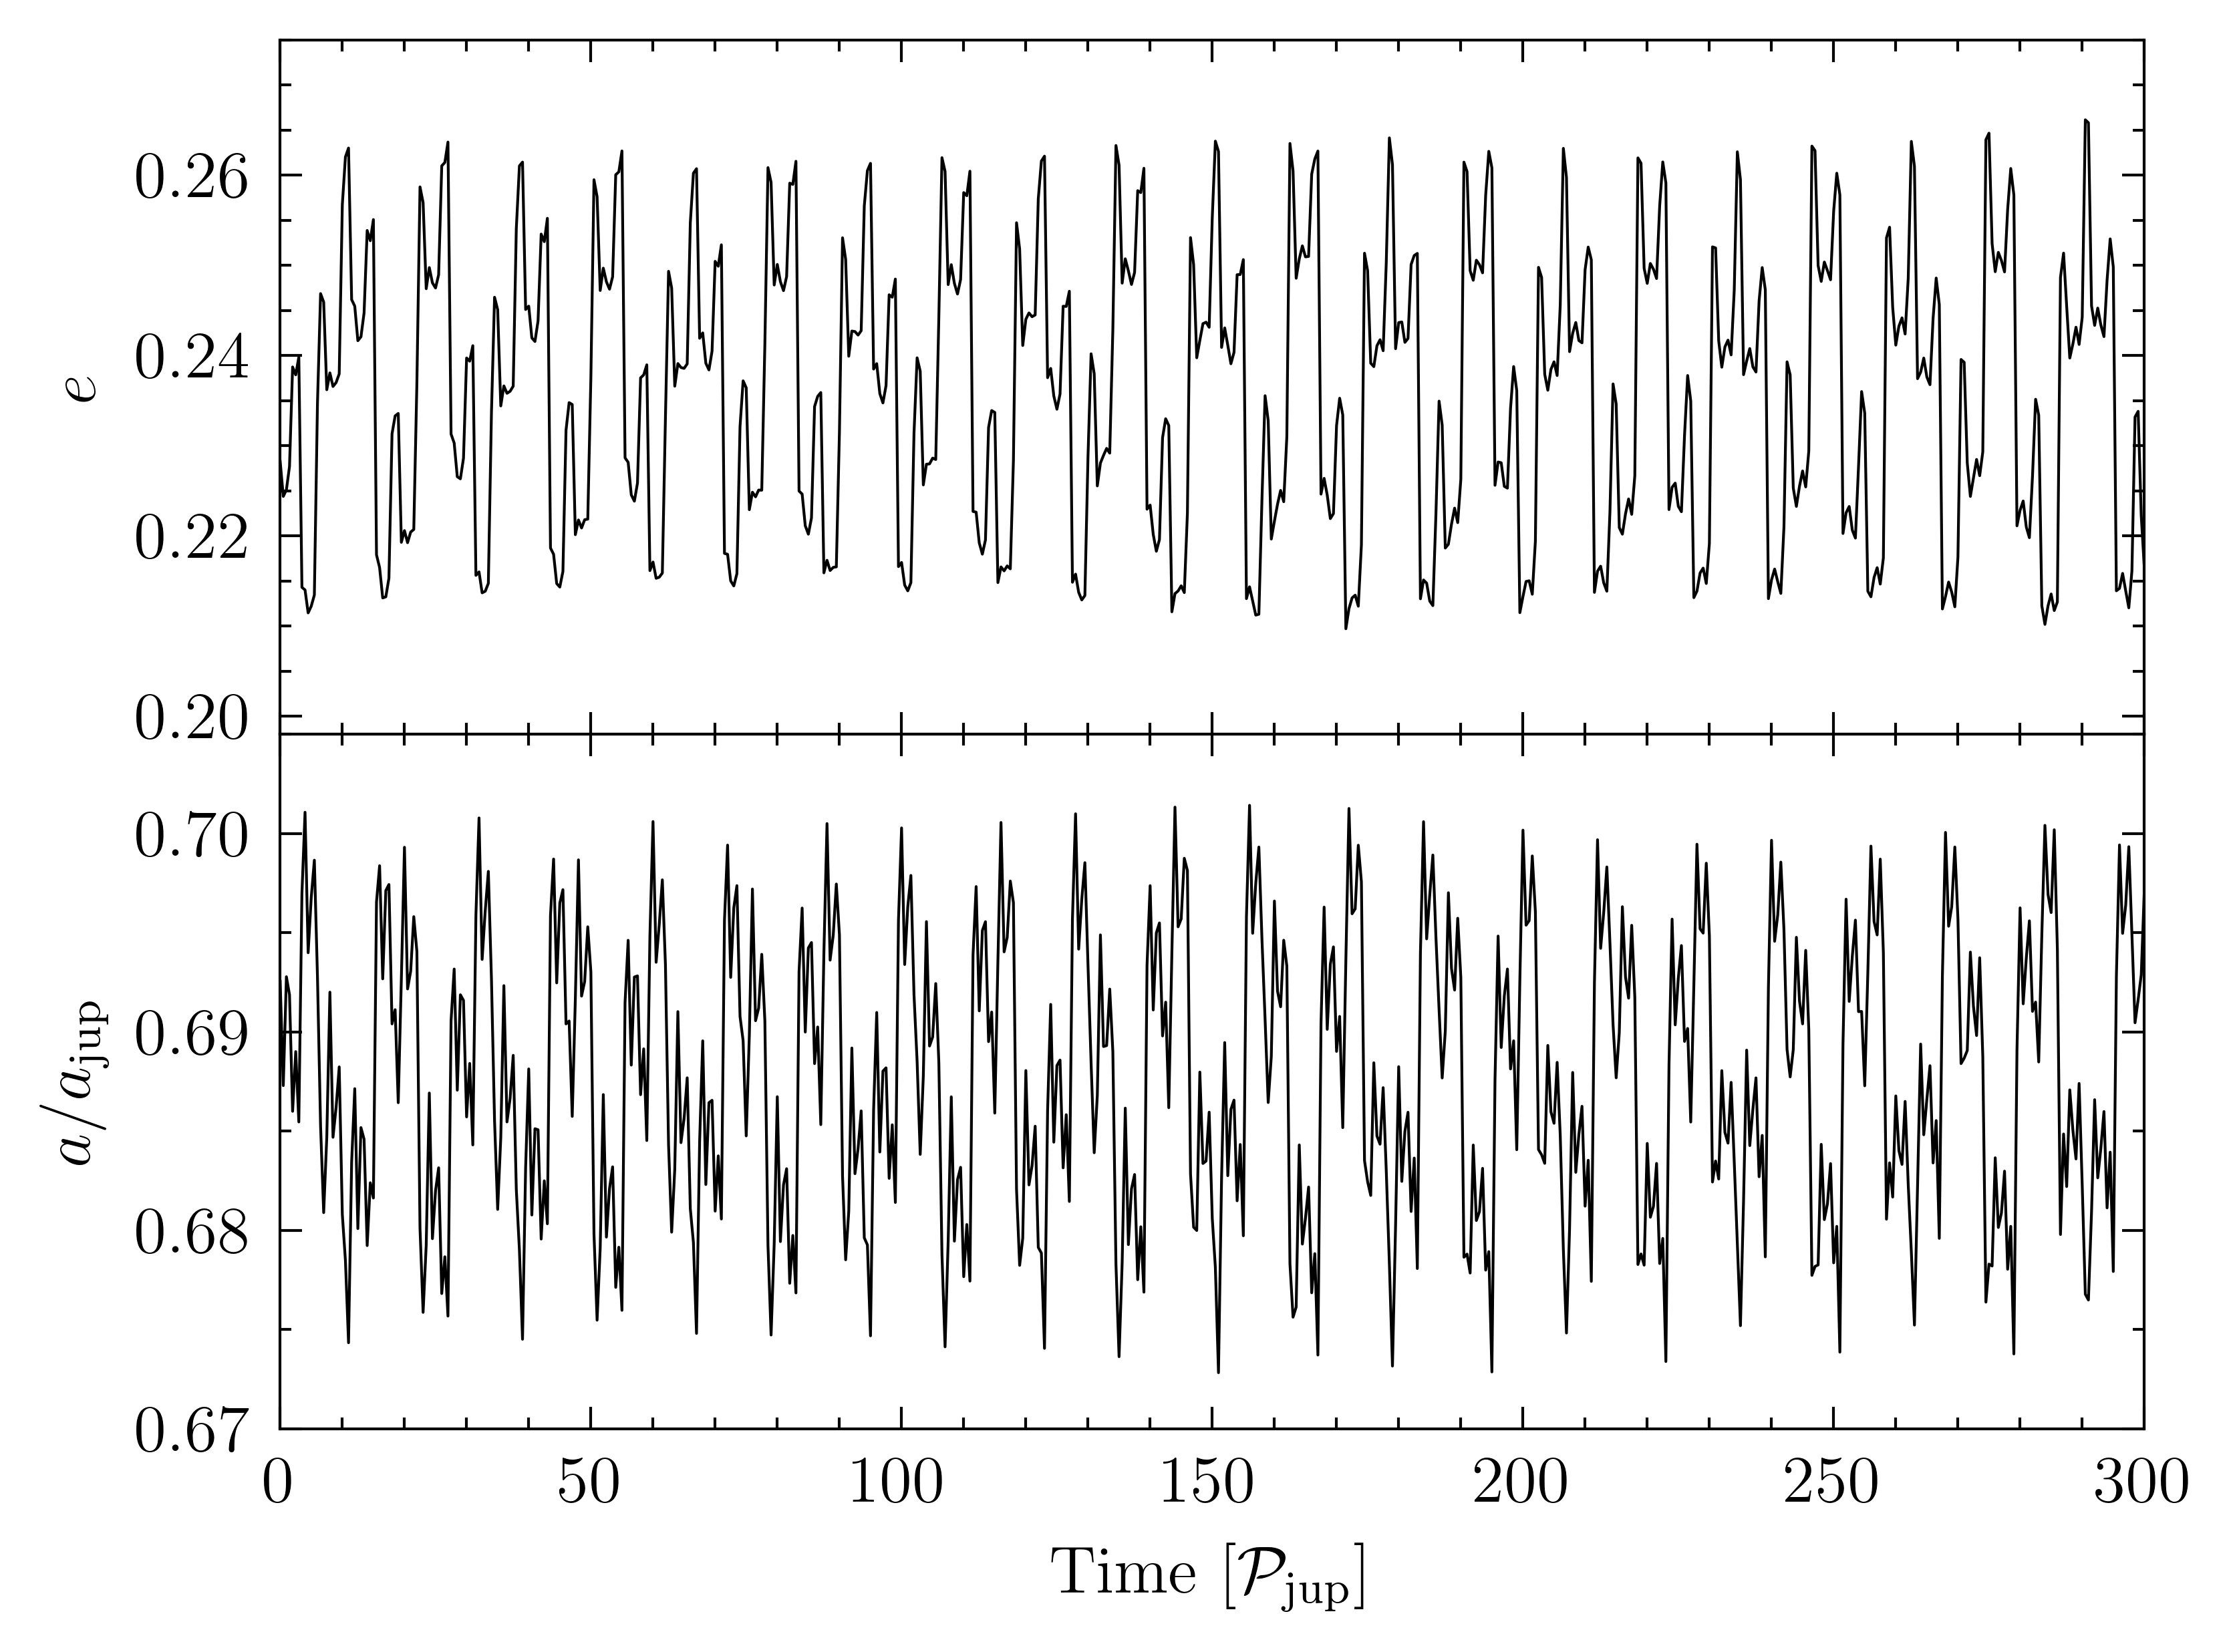

In [7]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0, hspace=0)

# panel 1 (top): eccentricity

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(0,tMax)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.set_xticklabels([])
ax1.set_ylim(0.198,0.275)
ax1.yaxis.set_major_locator(MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(MultipleLocator(0.005))
ax1.set_ylabel(r'$e$',fontsize=axisFontSize)

ax1.plot(tqp,eqp,'-',color='black',lw=0.5)

# panel 2 (bottom): semi-major axis

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(0,tMax)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.set_ylim(0.67,0.705)
ax2.yaxis.set_major_locator(MultipleLocator(0.01))
ax2.yaxis.set_minor_locator(MultipleLocator(0.005))
ax2.set_xlabel(r'Time [$\mathcal{P}_\mathrm{jup}$]',fontsize=axisFontSize)
ax2.set_ylabel(r'$a/a_\mathrm{jup}$',fontsize=axisFontSize)

ax2.plot(tqp,aqp,'-',color='black',lw=0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

## Statistics

Compute statistics of interest for q and e.
 * median a and e
 * min/max a and e


In [8]:
med_a = np.median(aqp)
min_a = np.min(aqp)
max_a = np.max(aqp)

med_e = np.median(eqp)
min_e = np.min(eqp)
max_e = np.max(eqp)

print(f'Statistics:')
print(f'  a: median = {med_a:.4f}*a_j min={min_a:.4f} max={max_a:.4f}')
print(f'  e: median = {med_e:.4f} min={min_e:.4f} max={max_e:.4f}')


Statistics:
  a: median = 0.6880*a_j min=0.6728 max=0.7014
  e: median = 0.2376 min=0.2097 max=0.2661


## Supplemental plots

Referenced in the text but not plotted is the periaspe and apoapse behavior of the asteroid during the 
period displayed in the previous cells.
 * periapse = $a(1-e)$
 * apoapse = $a(1+e)$

Note that both are in units of $a_\mathrm{jup}$.

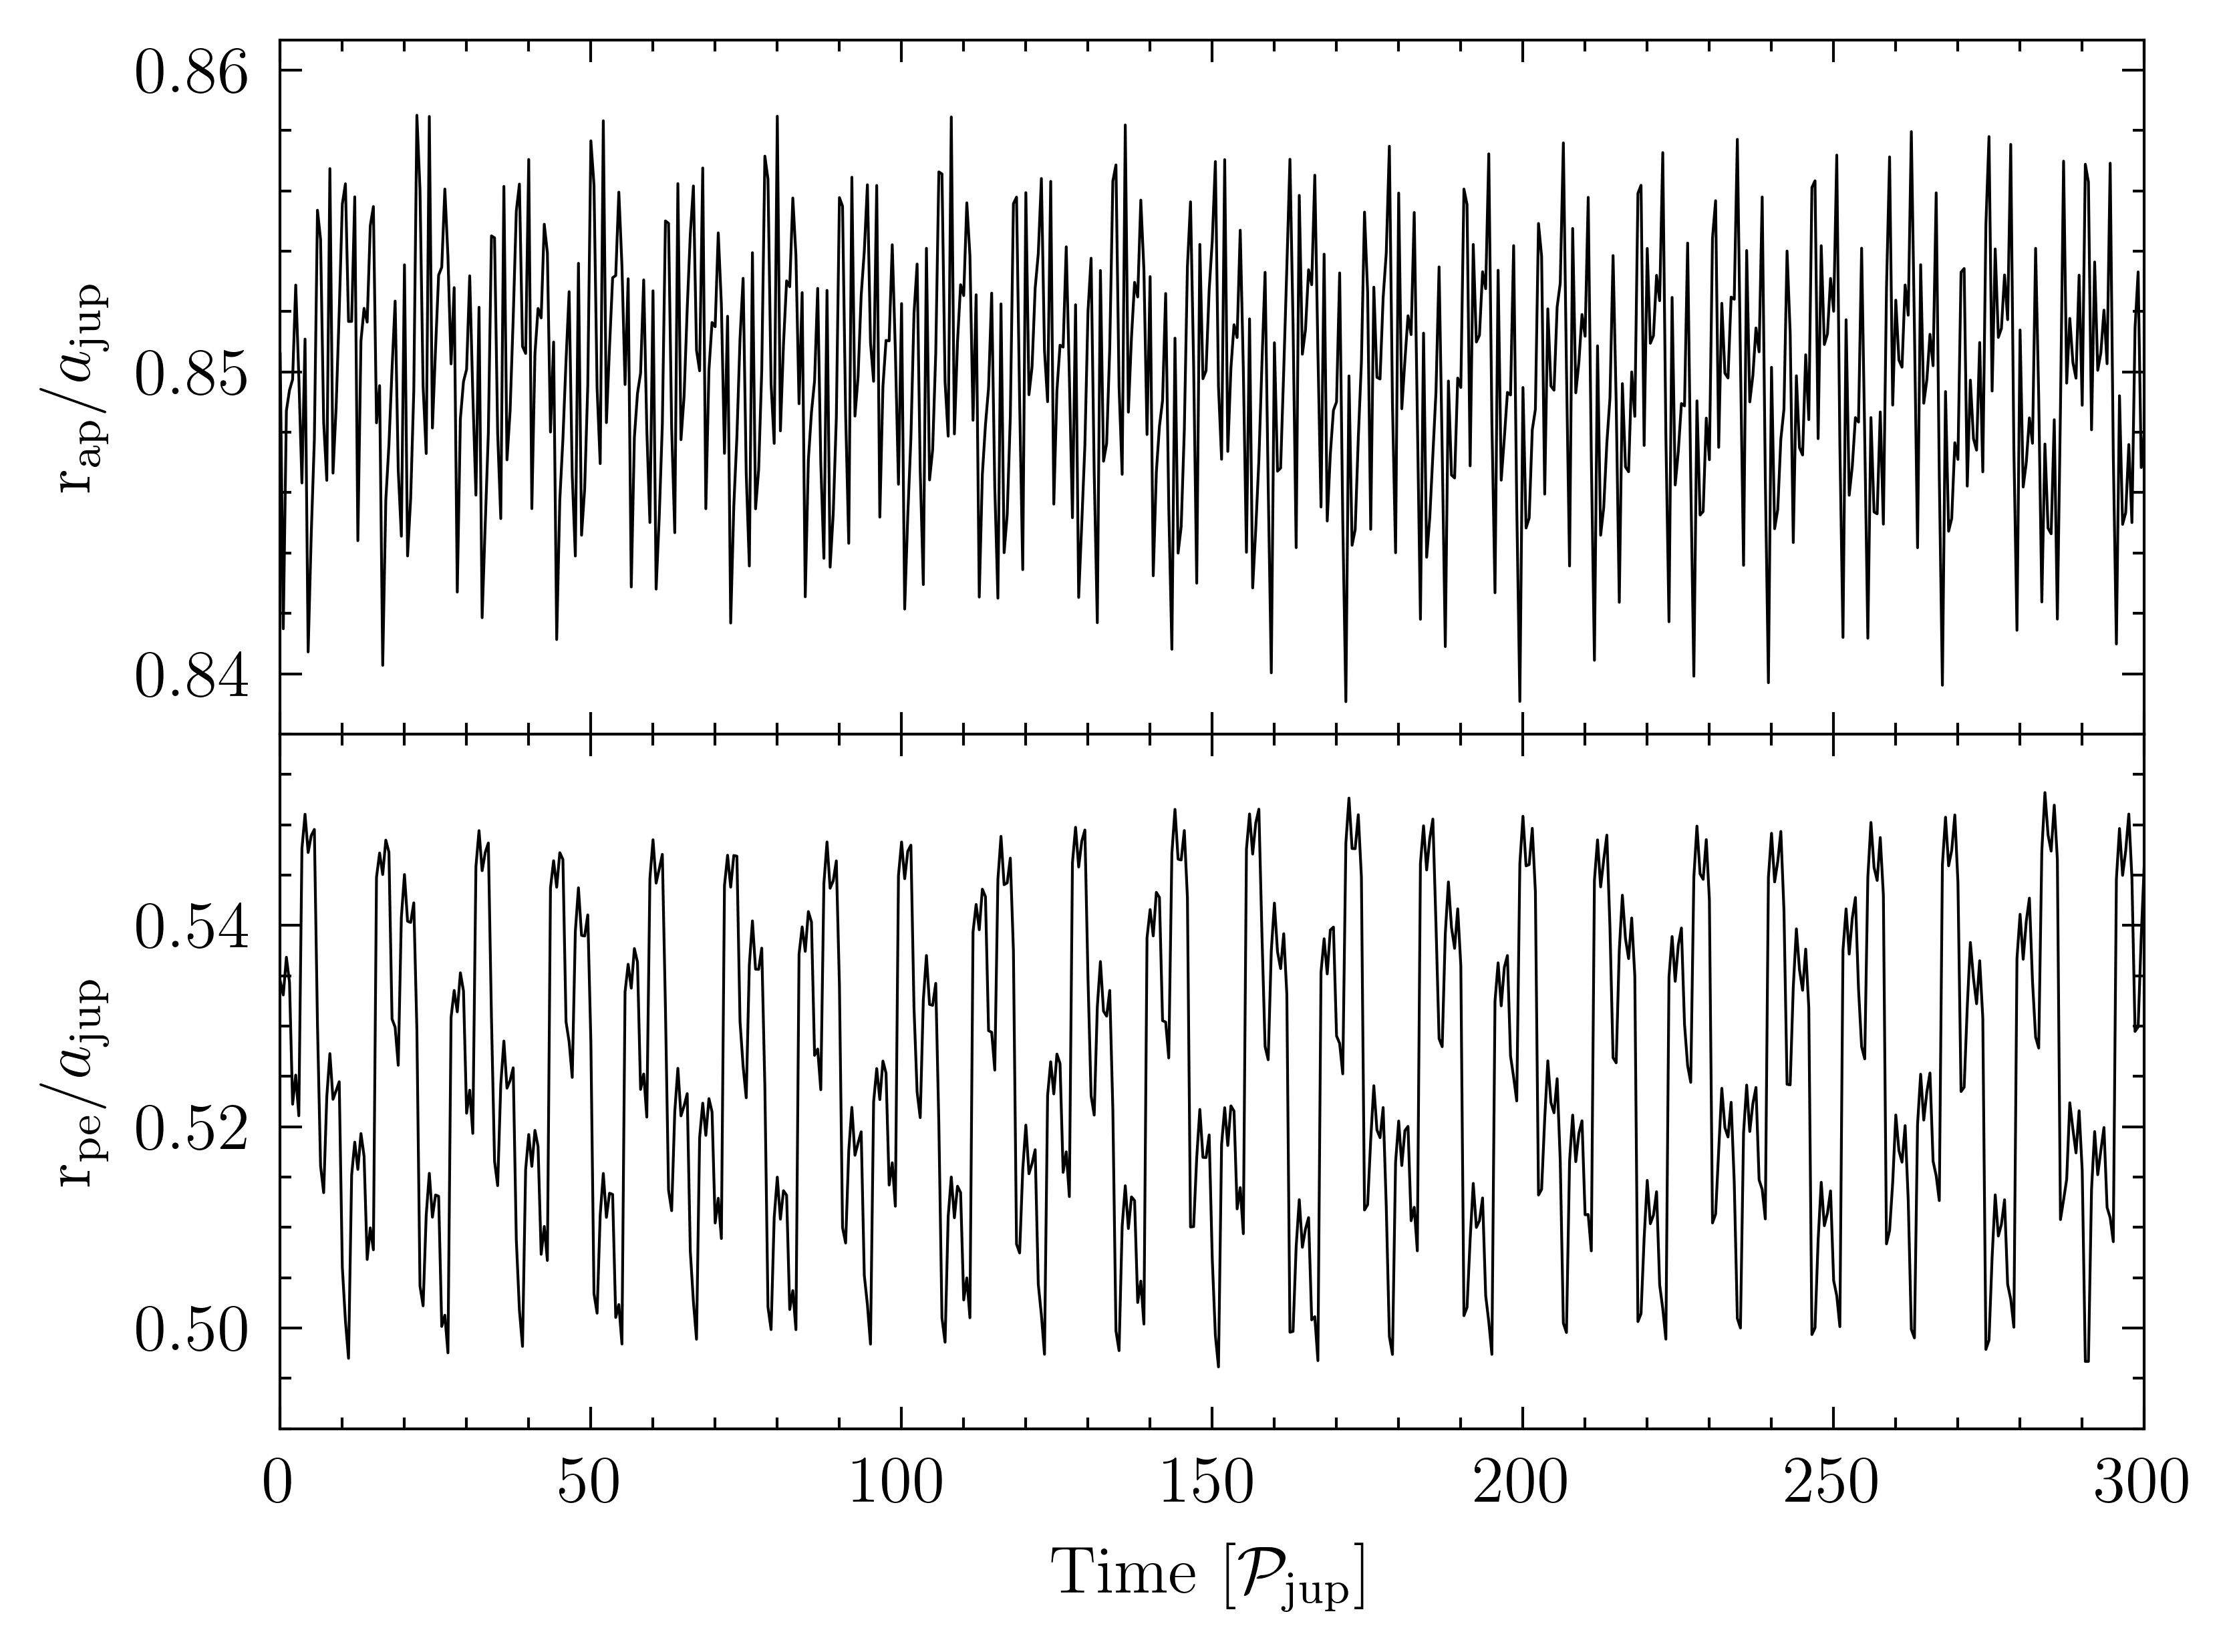

In [9]:
peri = aqp*(1.0-eqp)
apo = aqp*(1.0+eqp)

outFile = f'Fig3_4_ap.png'
makePlot = False

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0, hspace=0)

# panel 1 (top): eccentricity

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(0,tMax)
ax1.xaxis.set_major_locator(MultipleLocator(50))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.set_xticklabels([])
ax1.set_ylim(0.838,0.861)
ax1.yaxis.set_major_locator(MultipleLocator(0.01))
ax1.yaxis.set_minor_locator(MultipleLocator(0.002))
ax1.set_ylabel(r'r$_\mathrm{ap}/a_\mathrm{jup}$',fontsize=axisFontSize)

ax1.plot(tqp,apo,'-',color='black',lw=0.5)

# panel 2 (bottom): semi-major axis

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(0,tMax)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.set_ylim(0.49,0.559)
ax2.yaxis.set_major_locator(MultipleLocator(0.02))
ax2.yaxis.set_minor_locator(MultipleLocator(0.005))
ax2.set_xlabel(r'Time [$\mathcal{P}_\mathrm{jup}$]',fontsize=axisFontSize)
ax2.set_ylabel(r'r$_\mathrm{pe}/a_\mathrm{jup}$',fontsize=axisFontSize)

ax2.plot(tqp,peri,'-',color='black',lw=0.5)

plt.plot()
if makePlot:
    plt.savefig(outFile,bbox_inches='tight',facecolor='white')